# Steph Curry is a Black Swan

In a predraft analysis in 2009, NBA scout Jonathan Givony said of Stephen Curry, "In the right situation, alongside the right teammates, he could be a very effective NBA player, and his excellent intangibles and winning mentality lead you to believe that he’ll find a way to carve out a successful niche." This lukewarm pre-draft assesment was great compared to former ESPN analyst Doug Gottlieb, who said in a tweet "he doesnt have the upside of Rubio, Jennings, Flynn, Mills, Teague all more athletic." In comparison, other NBA stars were known high-value quantities. Lebron James signed a \$90 million deal with NIKE _before he graduated high school_ and is ceratinly one of the top 10 players in NBA history. But, as Magic Johnson said in late February, Curry "has a chance to be the greatest player we've ever seen."

Stephen Curry's 2014-2015 season may go down as the greatest statistical season in NBA history. Consider the figure below (or wherever). It compares a player's Player Effeciency Rating (PER), an overall measure of their quality of play, and their True Shooting Percentage (TS\%). The TS\% is half the points scored per scoring posession, so for example, a TS\% of 0.7 means a player scored 1.4 points per scoring posession. This dataset starts at the beginning of the 3-pt era and considers high volume shooters, players that averaged at least 20 shot attempts per game. For most of the season Curry has had the highest value for these measures _of all time_. At the end of the Warriors 24-game winning streak he had a TS\% of 0.7 and a PER around 35 whereas the league average for true shooting percentage is 0.54 and PER is 14.32. He has regressed to the mean, slightly, but there is a chance he will acheive the highest PER and TS\% of all time this season. If we assume PER and TS\% are normally distributed, though not uncorrelated, then the joint probability of him leading the league in both categories is virtually impossible. A conservative estimate shows this occurs about once every 100 years. 

Even more absurd is Curry's three-point shooting. He is on pace  to make 404 3-pt makes this season, breaking the previous record (his own), of 286. This 41 \% increase, if applied to baseball's single season home-run record, would increase the record from 73 to 103. Curry's long range shooting is in the literal meaning of the word, unbelievable. From 28 - 48 feet Curry is making 54\% of his shots while the rest of the league averages 12\%. His effective FG\% from this range is 81\% meaning he is _better_ from this range than someone making 81\% of their two point shots. 

Curry, and the Warriors, are having an extreme impact on the game of basketball. Most notably, their "small ball" lineup, or "death ball" squad, which features 4 guards and a 6-6 center, has transformed the NBA. Much in the same way the Jordan rules turned the NBA into a cage match, the small ball lineup is changing the way NBA teams draft and play.


But what makes him different? Could anyone have seen this coming? In October of 2014 the oddsmakers gave Stephen Curry of the Golden State Warriors 28/1 odds, or a 3.45\% chance, to be the NBA's Most Valuable Player. The Warriors themselves had 20/1 odds winning the NBA title and the Westgate Las Vegas Superbook put the over/under on wins at 50.5. To put this into perspective, consider that at the time of writing, the aggregate of prediction markets give Paul Ryan (R-WI) a 4\% chance of being the Republican Presidential Nominee, and he is not even running. 

As it turned out, Curry won the MVP, collecting 100 of 130 first-place votes. The Warriors won the NBA title and amassed 67 regular season wins, 4th best of all time. This season, Curry will win his second MVP, the team will almost surely secure the greatest regular season win total of all time, and they are consencus favorites to win the championship. If he continues to perform close to this level he may be the GOAT. We have seen great player's and great statistical accomplishments before and so the question remains: what makes Stephen Curry so unique? 

In October 2012, the Warriors signed Curry to a 4-year \$44-million extension that was considered a http://nba.nbcsports.com/2012/10/31/warriors-gm-explains-teams-reasoning-behind-stephen-currys-contract-extension/(gamble) by many, including the GM that signed him. 

 

Curry is great and this season is an all-timer. What is different about him from NBA superstars of the past is his size and skill set. Jordan, Magic, Bird, Wilt were all _supposed_ to be great and their athletic disposition was convincing. Curry could be confused for an everyman both in build and in character. 


An event that is 4 standard deviations away from it's mean happens with a frequency of 1 in 31574. The interpretation for the PER and TS\% data is that Stephen Curry's current season will happen 1 time for every 31,574 statistical NBA seasons. Assuming there are 350 qualified players in an NBA season, a conservative estimate is that this will happen, at most, to one player, in one season, once every 100 years.



In [1]:
# 2015-2016 Stats

In [5]:
# --- Imports ---
import datetime as dt
import sys,os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import re
from scipy import stats
from pylab import *
from matplotlib.patches import FancyArrowPatch
from sklearn.neighbors import KernelDensity
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


In [6]:
filename = 'PER_ESPN_stats.csv'
df = pd.read_csv(filename, na_values=['na'])
for keys in df.keys():
    print keys


PLAYER
GP
MPG
TS%
AST
TO
USG
ORR
DRR
REBR
PER
VA
EWA


In [7]:
def stats_to_display(data):
    n, min_max, mean, var, skew, kurt = stats.describe(data)
    print("Number of elements: {0:d}".format(n))
    print("Minimum: {0:8.6f} Maximum: {1:8.6f}".format(min_max[0], min_max[1]))
    print("Mean: {0:8.6f}".format(mean))
    print("Standard Deviation: {0:8.6f}".format(np.std(data)))
    print("Variance: {0:8.6f}".format(var))
    print("Skew : {0:8.6f}".format(skew))
    print("Kurtosis: {0:8.6f}".format(kurt))
    nmbr_std  = (min_max[1] - mean)/np.std(data)
    print("Number of Standard Deviations the Max is from mean: {0:8.6f}".format(nmbr_std))

In [8]:
n, min_max, mean, var, skew, kurt = stats.describe(df.PER)
print("Number of elements: {0:d}".format(n))
print("Minimum: {0:8.6f} Maximum: {1:8.6f}".format(min_max[0], min_max[1]))
print("Mean: {0:8.6f}".format(mean))
print("Standard Deviation: {0:8.6f}".format(np.std(df.PER)))
print("Variance: {0:8.6f}".format(var))
print("Skew : {0:8.6f}".format(skew))
print("Kurtosis: {0:8.6f}".format(kurt))
nmbr_std  = (min_max[1] - mean)/np.std(df.PER)
print("Number of Standard Deviations the Max is from mean: {0:8.6f}".format(nmbr_std))

Number of elements: 348
Minimum: 3.800000 Maximum: 31.700000
Mean: 14.323276
Standard Deviation: 4.433600
Variance: 19.713454
Skew : 0.630640
Kurtosis: 0.687521
Number of Standard Deviations the Max is from mean: 3.919326


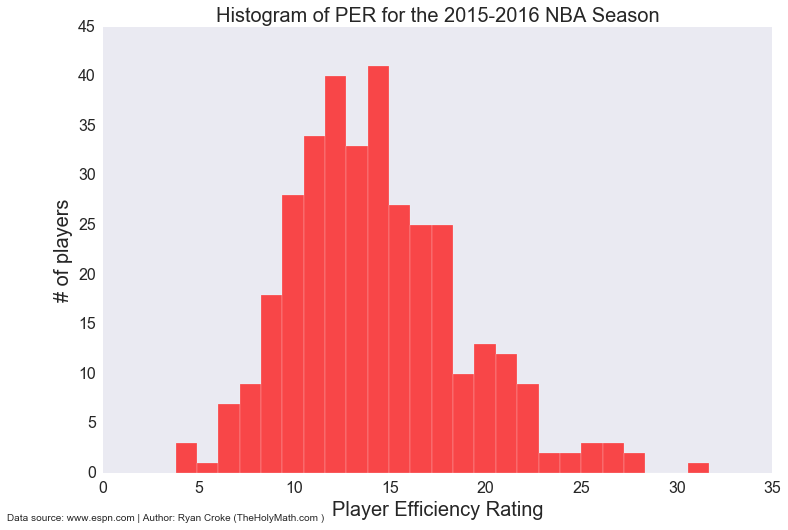

In [9]:
hist, bins = np.histogram(df.PER, bins=25)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.figure(figsize=(12, 8), dpi=300)
plt.bar(center, hist, align='center', width=width,alpha=0.7,facecolor="red",edgecolor='w')
plt.xlabel('Player Efficiency Rating',fontsize=20)
plt.ylabel('# of players',fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.title('Histogram of PER for the 2015-2016 NBA Season',fontsize=20)
plt.text(-5,-4.8, "Data source: www.espn.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.grid(False)
plt.axis(bgcolor='white')
plt.savefig('Histogram_PER.png', bbox_inches='tight')
plt.show()

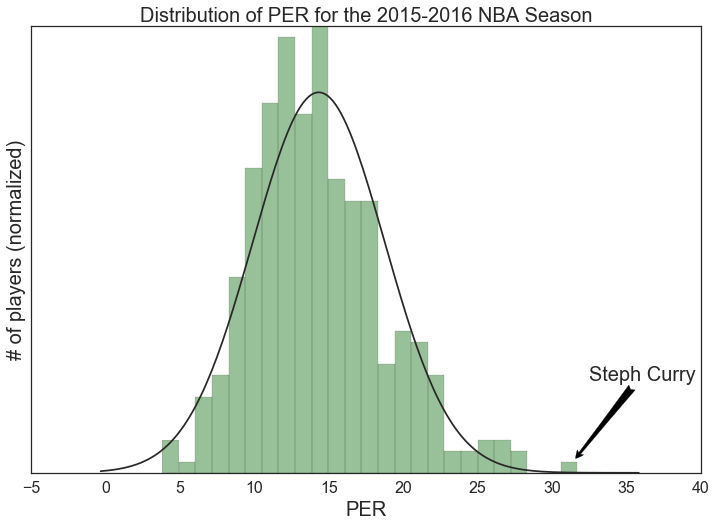

In [25]:
plt.figure(figsize=(12, 8), dpi=300,facecolor='white')
#sns.kdeplot(df.PER, shade=True)
plt.yticks([],fontsize=16)
#plt.setp(get_yticklabels(), visible=False)
plt.xticks(fontsize=16)
plt.title('Distribution of PER for the 2015-2016 NBA Season',fontsize=20)
plt.annotate('Steph Curry', xy=(31.5, 0.003), xytext=(32.5, 0.022),fontsize=20,
            arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3",facecolor='black'),)
#plt.text(-5,-0.015, "Data source: www.espn.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.xlabel('Player Efficiency Rating',fontsize=20)
plt.ylabel('# of players (normalized)',fontsize=20)
sns.distplot(df.PER, kde=False, fit=stats.norm,color="darkgreen",label='Histogram Data',bins=25);
sns.set_style("white")
plt.savefig('Curry_Normal_PER.png', bbox_inches='tight')
#plt.legend(fontsize=20);

In [8]:
filename = 'true_shooting_percentage.csv'
df_tsp = pd.read_csv(filename, na_values=['na'])

n, min_max, mean, var, skew, kurt = stats.describe(df_tsp['TS%'])
print("Number of elements: {0:d}".format(n))
print("Minimum: {0:8.6f} Maximum: {1:8.6f}".format(min_max[0], min_max[1]))
print("Mean: {0:8.6f}".format(mean))
print("Standard Deviation: {0:8.6f}".format(np.std(df_tsp['TS%'])))
print("Variance: {0:8.6f}".format(var))
print("Skew : {0:8.6f}".format(skew))
print("Kurtosis: {0:8.6f}".format(kurt))
nmbr_std  = (min_max[1] - mean)/np.std(df_tsp['TS%'])
print("Number of Standard Deviations the Max is from mean: {0:8.6f}".format(nmbr_std))


Number of elements: 295
Minimum: 0.445000 Maximum: 0.670000
Mean: 0.529627
Standard Deviation: 0.038726
Variance: 0.001505
Skew : 0.302989
Kurtosis: -0.181226
Number of Standard Deviations the Max is from mean: 3.624760


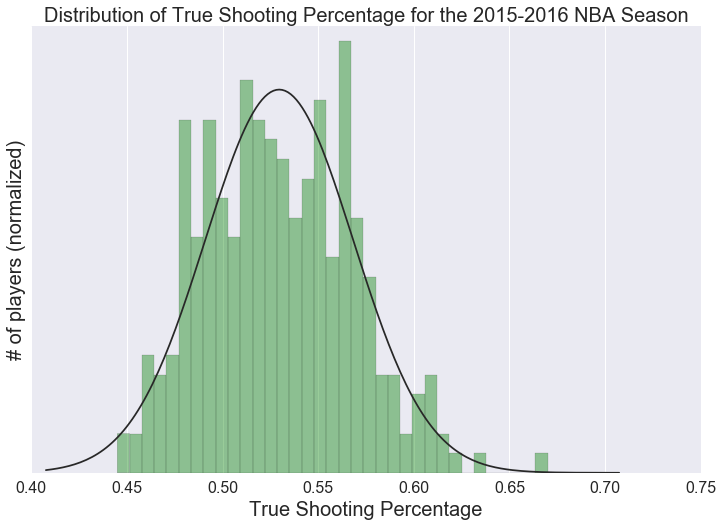

In [9]:
plt.figure(figsize=(12, 8), dpi=300)
#sns.kdeplot(df.PER, shade=True)
sns.distplot(df_tsp['TS%'], kde=False, fit=stats.norm,color="g",label='Histogram Data',bins=35);
plt.yticks([],fontsize=16)
#plt.setp(get_yticklabels(), visible=False)
plt.xticks(fontsize=16)
plt.title('Distribution of True Shooting Percentage for the 2015-2016 NBA Season',fontsize=20)
#plt.annotate('Steph Curry', xy=(31.5, 0.003), xytext=(32.5, 0.022),fontsize=20,
            #arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3",facecolor='black'),)
#plt.text(-5,-0.015, "Data source: www.espn.com | "  "Author: Ryan Croke (TheHolyMath.com )", fontsize=10)
plt.xlabel('True Shooting Percentage',fontsize=20)
plt.ylabel('# of players (normalized)',fontsize=20)
#plt.savefig('Curry_Normal.png', bbox_inches='tight')
#plt.legend(fontsize=20);

In [3]:
filename = 'true_shooting_percentage_with_PER.csv'
df_tsp_per = pd.read_csv(filename, na_values=['na'])


In [4]:
len(df_tsp_per)

258

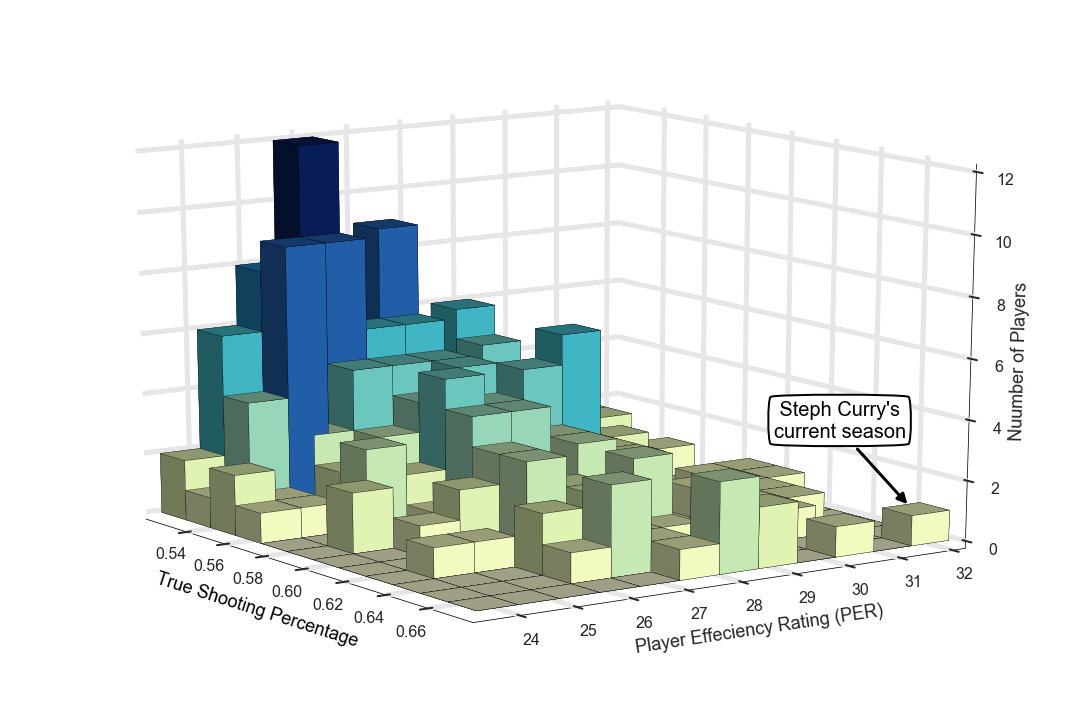

In [133]:
fig = plt.figure(figsize=(15,10),facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.set_axis_bgcolor('white')

x  = np.array(df_tsp_per['TS%'])
y = np.array(df_tsp_per['PER'])
hist, xedges, yedges = np.histogram2d(x, y, bins=(12,12))
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

import matplotlib.colors as colors

offset = dz + np.abs(dz.min())
fracs = offset.astype(float)/offset.max()
norm = colors.Normalize(fracs.min(), fracs.max())
colors = cm.YlGnBu(norm(fracs)) #viridis

ax.tick_params(labelsize=16)

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors,alpha=1.0)
ax.mouse_init(rotate_btn=3, zoom_btn=3)
plt.xlabel("True Shooting Percentage",labelpad=20,fontsize=18,color='k')
plt.ylabel("Player Effeciency Rating (PER)",labelpad=20,fontsize=18)
ax.set_zlabel('Nuumber of Players',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
bbox_props = dict(boxstyle="Round4,pad=0.3", fc="white", ec="k", lw=2)
ax.text(0.67, 29, 4, " Steph Curry's\ncurrent season", color='black',size=20, zorder=1,bbox=bbox_props)
a = Arrow3D([0.66, 0.65], [31, 32.5], [3, 0.5], mutation_scale=20, arrowstyle='-|>', color='k',lw=3)
ax.add_artist(a)
ax.grid(b=True, which='major', color='b', linestyle='-')
ax.w_xaxis.gridlines.set_lw(5.0)
ax.w_yaxis.gridlines.set_lw(5.0)
ax.w_zaxis.gridlines.set_lw(5.0)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
fig.tight_layout()

ax.autoscale_view('tight')
# Add a title
#ax.set_title('James Harden FGA \n2014-15 Reg. Season', 
#             y=0.6, x=0.2,fontsize=18)

# Add Data Scource and Author
#ax.text(340,445,0,'Data Source: stats.nba.com'
        #'\nAuthor: Ryan Croke (TheHolyMath.com)',fontsize=12,rotation = 45)
ax.grid(True)
axes = plt.gca()
ax.azim = -35 #rotation about z-axis
ax.elev = 15
plt.savefig('Curry_TSP_PER.png', bbox_inches='tight')
#plt.axis('off')
plt.show()

From Wikipedia: A six sigma process is one in which 99.99966% of all opportunities to produce some feature of a part are statistically expected to be free of defects (3.4 defective features per million opportunities)

In [8]:
# 4.130983 is 99.9936% within interval ... or there is a 0.006% a data point is within 4 standard deviations, but this is a two-sided
# statistic so divide by 2...that is 0.003% chance all data (pos) is inside (mean,4sigma). This is a probability of 0.00003 and
# the fraction outsided (two-side) is 1 / 15787 and so the one-sided is double that 1 / (15787*2) or 1/ 31574. This means that 
# Steph Curry's season will happen 1 time for every 31,574 statistal seasons. If there are about 350 qualified player seasons per year
# then this happens every 90 NBA seasons. And this is an underestimate. 

# How to embed in website

* mpld3.save_html(fig, 'name.html') - saves as an html
* copy the html source code into a custom field in Wordpress - example: CODE1
* In WYSIWIG use %CODE1% to embed